In [4]:
from sklearn.manifold import MDS
from scipy.spatial.distance import squareform
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import torch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import geoopt  # For hyperbolic geometry operations


In [ ]:
import pickle
import umap
with open('/mnt/ssd1/mary/Diffusion-Models-Embedding-Space-Defense/embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
    #print(loaded_data)
embedding_tensor = loaded_data[0]
captions = loaded_data[1]
le = LabelEncoder()
labels = le.fit_transform(captions)  # e.g., ['cat', 'dog', 'fish'] → [0, 1, 2]
  
captions = torch.tensor(labels, dtype=torch.long)
print(captions)

tensor([7, 4, 4,  ..., 0, 0, 0])


In [23]:
print(loaded_data[0].shape)
print(captions.shape)

torch.Size([10177, 768])
torch.Size([10177])


In [28]:
import umap
import torch

# Convert embeddings to numpy if needed
if isinstance(loaded_data[0], torch.Tensor):
    embedding_tensor = loaded_data[0].cpu().numpy()
else:
    embedding_tensor = loaded_data[0]

# Convert captions to numpy
captions_tensor = captions  # assuming this is a torch.Tensor
captions_np = captions_tensor.cpu().numpy()

# Run UMAP with supervision using captions
hyperbolic_mapper = umap.UMAP(
    n_components=3,
    output_metric='hyperboloid',
    target_metric='categorical',
    random_state=42
).fit(embedding_tensor, y=captions_np)



/mnt/ssd1/mary/micromamba/envs/safe-clip/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(10177, 3)


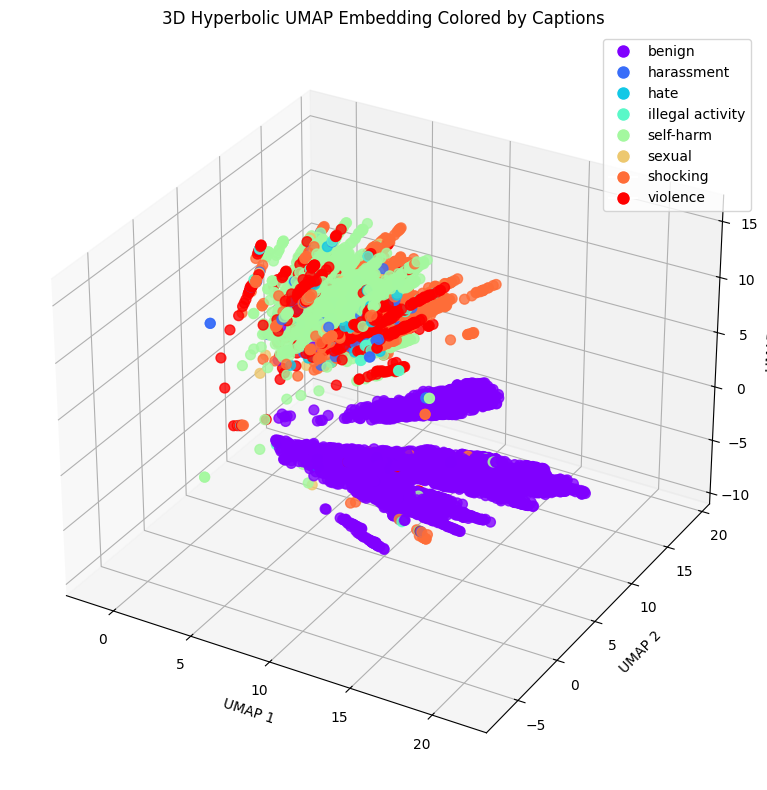

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# After fitting UMAP with supervision:
embedding_3d = hyperbolic_mapper.embedding_  # shape (N, 3)
print(embedding_3d.shape)

# Prepare labels
labels = captions_np  # numeric labels for coloring
# Assuming captions_np contains string labels (like 'cat', 'dog', etc.)
unique_labels_str = np.unique(captions_np)
class_names = unique_labels_str.tolist()
n_colors = len(class_names)
colormap = plt.cm.rainbow(np.linspace(0, 1, n_colors))
custom_cmap = ListedColormap(colormap)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map string labels to numeric indices for coloring
label_to_idx = {label: idx for idx, label in enumerate(class_names)}
numeric_labels = np.array([label_to_idx[label] for label in captions_np])

scatter = ax.scatter(
    embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
    c=numeric_labels, cmap=custom_cmap, s=50, alpha=0.8
)

# Create legend with class names
class_names = le.classes_  
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=custom_cmap(i), markersize=10,
               label=class_names[i])
    for i in range(n_colors)
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.set_title('3D Hyperbolic UMAP Embedding Colored by Captions')

plt.tight_layout()
plt.show()
